# Análise HCNSW nmslib

## Imports

In [9]:
from numpy import load
from math import sqrt
from tabulate import tabulate
import matplotlib.pyplot as plt

## Constantes e funções

In [10]:
DB_NAME = "sift1m"
METHOD_NAMES = ("hnsw", "hcnsw")

In [11]:
def get_mean_and_sd(values):
    mean = sum(values)/len(values)
    s2 = (sum((x-mean)**2 for x in values))/(len(values)-1)
    s = sqrt(s2)
    return mean, s

## Teste base (seed=0)

In [14]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    recalls[method_name] = load(f"data/{method_name}_{DB_NAME}_recalls.npy")
    deltas[method_name] = load(f"data/{method_name}_{DB_NAME}_deltas.npy")

In [5]:
table = []
for method_name in METHOD_NAMES:
    mean_recalls, s_recalls = get_mean_and_sd(recalls[method_name])
    mean_deltas, s_deltas = get_mean_and_sd(deltas[method_name])
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [6]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100         SD    query time (s)        SD
--------  ------------  ---------  ----------------  --------
hnsw          0.925456  0.0686424        0.00181133  0.167318
hcnsw         0.925259  0.0685414        0.00181643  0.167307


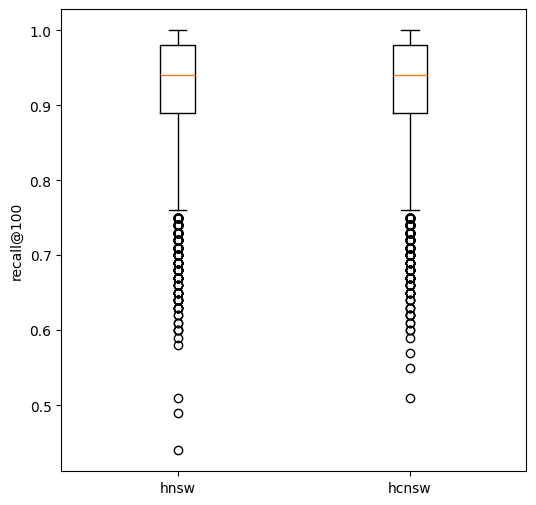

In [7]:
all_recalls = [recalls[method_name] for method_name in METHOD_NAMES]

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=METHOD_NAMES)

plt.show()

## Variação de seeds (1 a 30)

In [16]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    for seed in range(1, 31):
        recalls[(method_name, seed)] = load(f"data/{method_name}_{DB_NAME}_seed{seed}_recalls.npy")
        deltas[(method_name, seed)] = load(f"data/{method_name}_{DB_NAME}_seed{seed}_deltas.npy")

In [7]:
table = []
for method_name in METHOD_NAMES:
    for seed in range(1, 31):
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        table.append((method_name, seed, mean_recalls, s_recalls, mean_deltas, s_deltas, min(recalls[(method_name, seed)])))
table.sort(key=lambda row: row[2], reverse=True)

In [8]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "query time (s)", "SD", "min recall"]))

method      seed    recall@100         SD    query time (s)           SD    min recall
--------  ------  ------------  ---------  ----------------  -----------  ------------
hnsw           2      0.925694  0.0685885       0.000141751  7.30017e-05          0.49
hnsw          28      0.925691  0.0684381       0.000136246  3.69572e-05          0.54
hnsw          16      0.925633  0.0684686       0.000139939  3.67853e-05          0.56
hnsw           3      0.925625  0.0688978       0.000139618  3.35374e-05          0
hnsw          12      0.925596  0.0685545       0.000138776  9.96489e-05          0.51
hnsw          27      0.925576  0.0685274       0.000136258  4.63927e-05          0.51
hnsw          17      0.925563  0.0689498      -0.00679219   0.693067             0.45
hnsw          10      0.925557  0.0685031       0.00707623   0.693748             0.51
hnsw          13      0.925538  0.0684364       0.000137627  5.83941e-05          0.49
hnsw          11      0.925533  0.0687458     

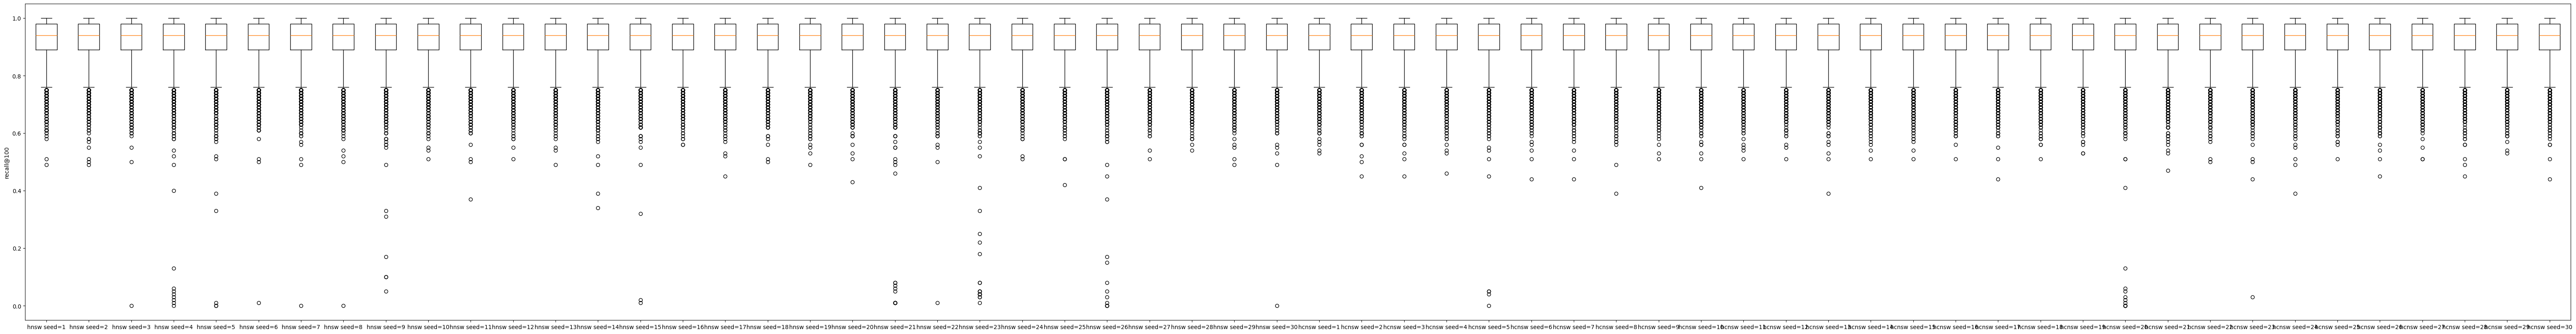

In [16]:
all_recalls = [recalls[(method_name, seed)] for method_name in METHOD_NAMES for seed in range(1, 31)]

fig, ax = plt.subplots()
fig.set_size_inches(80, 10)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=[f"{method_name} seed={seed}" for method_name in METHOD_NAMES for seed in range(1, 31)])

plt.show()

In [39]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in range(1, 31):
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        method_recalls.append(mean_recalls)
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        method_deltas.append(mean_deltas)
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [40]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100           SD    query time (s)          SD
--------  ------------  -----------  ----------------  ----------
hcnsw         0.925366  0.000191632       0.000367389  0.00221742
hnsw          0.925225  0.000598022      -0.000553365  0.00278923


In [19]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in range(1, 31):
        method_recalls += list(recalls[(method_name, seed)])
        method_deltas += list(deltas[(method_name, seed)])
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [20]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100         SD    query time (s)        SD
--------  ------------  ---------  ----------------  --------
hcnsw         0.925366  0.0691171        0.00152265  0.309905
hnsw          0.925225  0.0698029        0.00106289  0.25309


In [10]:
table = []
for method_name in METHOD_NAMES:
    for seed in range(1, 31):
        recalls_under_05 = 0
        recalls_under_03 = 0
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        table.append((method_name, seed, mean_recalls, s_recalls, recalls_under_05, recalls_under_03))
table.sort(key=lambda row: row[2], reverse=True)
table.sort(key=lambda row: row[4])
table.sort(key=lambda row: row[5])

In [11]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "recalls < 0.5", "recalls < 0.3"]))

method      seed    recall@100         SD    recalls < 0.5    recalls < 0.3
--------  ------  ------------  ---------  ---------------  ---------------
hnsw          28      0.925691  0.0684381                0                0
hnsw          16      0.925633  0.0684686                0                0
hnsw          12      0.925596  0.0685545                0                0
hnsw          27      0.925576  0.0685274                0                0
hnsw          10      0.925557  0.0685031                0                0
hcnsw         12      0.925509  0.0686205                0                0
hnsw          24      0.925502  0.0687156                0                0
hcnsw         22      0.925488  0.0686115                0                0
hcnsw         29      0.925482  0.0686929                0                0
hcnsw         27      0.925475  0.0686722                0                0
hcnsw         11      0.925465  0.0687548                0                0
hcnsw       

In [21]:
table = []
for method_name in METHOD_NAMES:
    method_recalls_under_05 = []
    method_recalls_under_03 = []
    for seed in range(1, 31):
        recalls_under_05 = 0
        recalls_under_03 = 0
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        method_recalls_under_05.append(recalls_under_05)
        method_recalls_under_03.append(recalls_under_03)
    mean_recalls_05, s_recalls_05 = get_mean_and_sd(method_recalls_under_05)
    mean_recalls_03, s_recalls_03 = get_mean_and_sd(method_recalls_under_03)
    table.append((method_name, mean_recalls_05, s_recalls_05, mean_recalls_03, s_recalls_03))
table.sort(key=lambda row: row[1])
table.sort(key=lambda row: row[3])

In [22]:
print(tabulate(table, headers=["method", "recalls < 0.5", "SD", "recalls < 0.3", "SD"]))

method      recalls < 0.5       SD    recalls < 0.3       SD
--------  ---------------  -------  ---------------  -------
hcnsw             1.16667  2.13482              0.5  1.94316
hnsw              2.9      4.33391              1.9  3.69856


In [17]:
for method_name in METHOD_NAMES:
    for seed in range(1, 31):
        for i, delta in enumerate(deltas[(method_name, seed)]):
            if delta < 0.00001:
                print(f"method={method_name} seed={seed} time={delta} recall={recalls[(method_name, seed)][i]}")